In [2]:
import fasttext, numpy as np, pandas as pd
import fasttext.util
# READS THE FILE INTO A DATAFRAME
df = pd.read_excel("annotations.xlsx")
# CREATES A DATAFRAME WITH ONLY THE COLUMNS WE NEED
dfx = [i.split(" ") for i in df.text]
dfx = np.array(dfx)
# ONE HOT ENCODES THE RESULT
dfy = pd.get_dummies(df.type)
ftfile = open("format.txt", "w")
# WRITES THE FILE FOR FASTTEXT
for i in df.text:
    ftfile.write(i + "\n")
ftfile.close()
# TRAINS ALL THE MODELS
ftmodel_cbow = fasttext.train_unsupervised("format.txt", model='cbow')
ftmodel_skipgram = fasttext.train_unsupervised("format.txt", model='skipgram')
ftmodel = fasttext.load_model("fastText/cc.en.300.bin")
# REDUCES WORD VECTORS TO LENGTH 2 (WORD VECTORS COME IN THE FORM OF A LIST)
fasttext.util.reduce_model(ftmodel, 2)
fasttext.util.reduce_model(ftmodel_cbow, 2)
fasttext.util.reduce_model(ftmodel_skipgram, 2)

<ipython-input-2-f041ac669b9b>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dfx = np.array(dfx)


In [3]:
# REASSIGNMENT
vectorizer1 = ftmodel
vectorizer2 = ftmodel_cbow
vectorizer3 = ftmodel_skipgram

In [4]:
# REARRANGES WORD MATRICES FOR CODING PURPOSES
words1 = np.zeros(shape = (17775, 100, 2), dtype = 'float')
for i in range(17775):
    for j in range(len(dfx[i])):
        words1[i][j] = vectorizer1.get_word_vector(dfx[i][j])

words2 = np.zeros(shape = (17775, 100, 2), dtype = 'float')
for i in range(17775):
    for j in range(len(dfx[i])):
        words2[i][j] = vectorizer2.get_word_vector(dfx[i][j])

words3 = np.zeros(shape = (17775, 100, 2), dtype = 'float')
for i in range(17775):
    for j in range(len(dfx[i])):
        words3[i][j] = vectorizer3.get_word_vector(dfx[i][j])

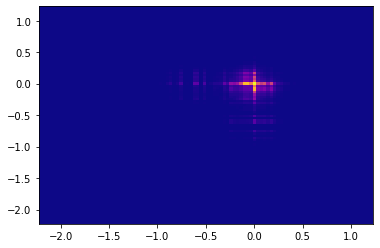

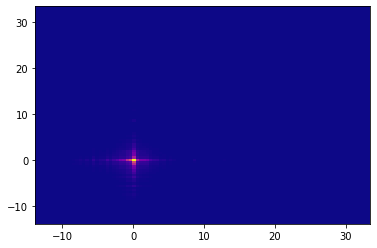

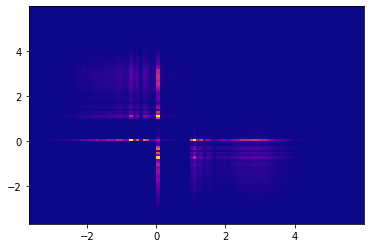

In [6]:
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
# CREATES THE HISTOGRAMS OF THE DATA
# PLOTS THE WORD VECTORS THAT WERE USED THAT WERE TRAINED BY EACH MODEL, HEATED BY THE TIMES THEY WERE USED
# DATA FOR PRETRAINED MODEL
data1 = []
for i in words1:
    data1.append(i.T)
data1 = np.array(data1)
data1 = np.reshape(data1, (2, 1777500)).T
odata1 = []
for i in range(len(data1)):
    if not (data1[i][0] == 0 and data1[i][1] == 0):
        odata1.append(data1[i])
odata1 = np.array(odata1).T
plt.hist2d(odata1[0], odata1[1], cmap = 'plasma', bins = 100)
plt.show()
# DATA FOR CBOW MODEL
data2 = []
for i in words2:
    data2.append(i.T)
data2 = np.array(data2)
data2 = np.reshape(data2, (2, 1777500)).T
odata2 = []
for i in range(len(data2)):
    if not (data2[i][0] == 0 and data2[i][1] == 0):
        odata2.append(data2[i])
odata2 = np.array(odata2).T
plt.hist2d(odata2[0], odata2[1], cmap = 'plasma', bins = 100)
plt.show()
# DATA FOR SKIPGRAM MODEL
data3 = []
for i in words3:
    data3.append(i.T)
data3 = np.array(data3)
data3 = np.reshape(data3, (2, 1777500)).T
odata3 = []
for i in range(len(data3)):
    if not (data3[i][0] == 0 and data3[i][1] == 0):
        odata3.append(data3[i])
odata3 = np.array(odata3).T
plt.hist2d(odata3[0], odata3[1], cmap = 'plasma', bins = 100)
plt.show()

In [7]:
key = 'center' #center distinguishable from left and right via skipgram

In [8]:
# DOES THE SAME AS BEFORE, EXCEPT ONLY FOR SENTENCES THAT HAVE HAVE BEEN CLASSIFIED AS A PARTICULAR LEANING GIVEN IN 'KEY'
words1 = np.zeros(shape = (17775, 100, 2), dtype = 'float')
for i in range(17775):
    if dfy.iloc[i][key] == 1:
        for j in range(len(dfx[i])):
            words1[i][j] = vectorizer1.get_word_vector(dfx[i][j])

words2 = np.zeros(shape = (17775, 100, 2), dtype = 'float')
for i in range(17775):
    if dfy.iloc[i][key] == 1:
        for j in range(len(dfx[i])):
            words2[i][j] = vectorizer2.get_word_vector(dfx[i][j])

words3 = np.zeros(shape = (17775, 100, 2), dtype = 'float')
for i in range(17775):
    if dfy.iloc[i][key] == 1:
        for j in range(len(dfx[i])):
            words3[i][j] = vectorizer3.get_word_vector(dfx[i][j])

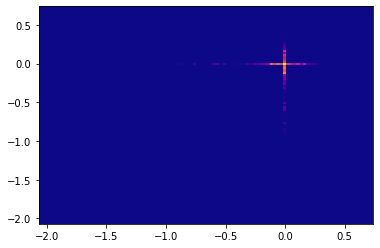

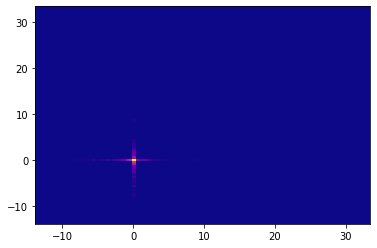

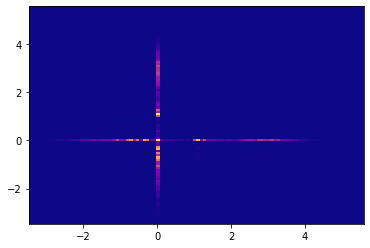

In [9]:
data1 = []
for i in words1:
    data1.append(i.T)
data1 = np.array(data1)
data1 = np.reshape(data1, (2, 1777500)).T
odata1 = []
for i in range(len(data1)):
    if not (data1[i][0] == 0 and data1[i][1] == 0):
        odata1.append(data1[i])
odata1 = np.array(odata1).T
plt.hist2d(odata1[0], odata1[1], cmap = 'plasma', bins = 100)
plt.show()

data2 = []
for i in words2:
    data2.append(i.T)
data2 = np.array(data2)
data2 = np.reshape(data2, (2, 1777500)).T
odata2 = []
for i in range(len(data2)):
    if not (data2[i][0] == 0 and data2[i][1] == 0):
        odata2.append(data2[i])
odata2 = np.array(odata2).T
plt.hist2d(odata2[0], odata2[1], cmap = 'plasma', bins = 100)
plt.show()

data3 = []
for i in words3:
    data3.append(i.T)
data3 = np.array(data3)
data3 = np.reshape(data3, (2, 1777500)).T
odata3 = []
for i in range(len(data3)):
    if not (data3[i][0] == 0 and data3[i][1] == 0):
        odata3.append(data3[i])
odata3 = np.array(odata3).T
plt.hist2d(odata3[0], odata3[1], cmap = 'plasma', bins = 100)
plt.show()

In [10]:
# CREATES TOKENIZERS THORUGH THE WORD VECTORS
from keras.preprocessing.text import Tokenizer
vocab_size = len(ftmodel.words)
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(dfx)
# CREATES INPUT DATAFRAME
dfx_nums = tokenizer.texts_to_sequences(dfx)
from keras.preprocessing.sequence import pad_sequences
dfx_nums_padded = pad_sequences(dfx_nums, maxlen = 100, padding = 'post', truncating = 'post')
# CREATES EMBEDDING MATRIX FOR EMBEDDING LAYER
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 2))
for word, i in tokenizer.word_index.items():
    embedding_vector = vectorizer3.get_word_vector(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dropout, Dense, Embedding, Bidirectional
from sklearn.model_selection import train_test_split
# CREATES EMBEDDING LAYER
embedding_layer = Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 2, weights = [embedding_matrix], trainable = False)
# CREATES MODEL
def buildmodell1():
    model = Sequential()
    model.add(embedding_layer)
    model.add(Conv1D(input_dim = 100, filters = 30, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Bidirectional(LSTM(units = 23, return_sequences = False)))#when activated sigmoid goes to 0.4025
    model.add(Dropout(rate = 0.05))
    model.add(Dense(units = 20, activation = 'relu', kernel_regularizer = keras.regularizers.l2(l = 0.001)))#DELETE THIS ACTIVATION FUNCTION
    model.add(Dense(units = 3, activation = 'sigmoid',))
    opt = keras.optimizers.Adam(learning_rate = 0.002)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


#actually build the model to generate the object
model_l1 = buildmodell1()
X_train, X_test, y_train, y_test = train_test_split(dfx_nums_padded, dfy, test_size=0.2, random_state=42)
#model
# history = model.fit(X_train,y_train, epochs = 5)
l1_history = model_l1.fit(dfx_nums_padded, dfy, validation_split=0.33, epochs=50, verbose=1)

Epoch 1/50
373/373 [==============================] - 35s 83ms/step - loss: 0.6195 - accuracy: 0.4225 - val_loss: 0.6103 - val_accuracy: 0.4340
Epoch 2/50
373/373 [==============================] - 29s 77ms/step - loss: 0.6060 - accuracy: 0.4432 - val_loss: 0.6037 - val_accuracy: 0.4374
Epoch 3/50
373/373 [==============================] - 30s 80ms/step - loss: 0.6041 - accuracy: 0.4434 - val_loss: 0.6027 - val_accuracy: 0.4446
Epoch 4/50
373/373 [==============================] - 30s 80ms/step - loss: 0.5985 - accuracy: 0.4619 - val_loss: 0.5981 - val_accuracy: 0.4519
Epoch 5/50
373/373 [==============================] - 30s 80ms/step - loss: 0.5934 - accuracy: 0.4682 - val_loss: 0.5913 - val_accuracy: 0.4662
Epoch 6/50
373/373 [==============================] - 30s 79ms/step - loss: 0.5864 - accuracy: 0.4868 - val_loss: 0.5900 - val_accuracy: 0.4686
Epoch 7/50
373/373 [==============================] - 30s 81ms/step - loss: 0.5770 - accuracy: 0.5060 - val_loss: 0.5753 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


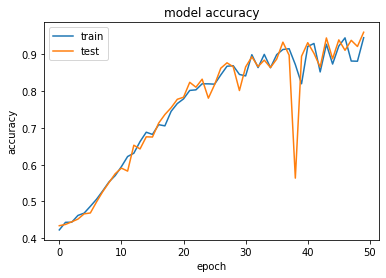

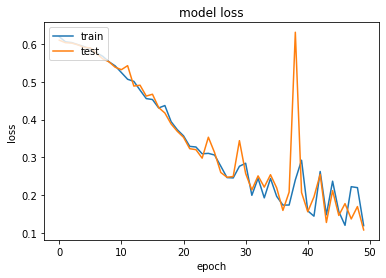

In [12]:
# list all data in history
print(l1_history.history.keys())

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(l1_history.history['accuracy'])
plt.plot(l1_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(l1_history.history['loss'])
plt.plot(l1_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# try to generalize to articles

import nltk.data
import re

# from nltk.tokenize import sent_tokenize

sent_split = nltk.data.load('tokenizers/punkt/english.pickle')

#open the text file 
conservative_article = open(r"Conservative_Article_1.txt")
left_article = open(r"Left_Article_1.txt")
center_article = open(r"Center_Article_1.txt")

#read the text files 
cons_article = conservative_article.read()
left_article = left_article.read()
cen_article = center_article.read()

#removing excalamation marks from the conservative article because they were interfering with the sentence tokenization 
cons_article = re.sub(r'[!]', '', cons_article)

#tokenize the articles into their composing sentences 
a1_sentences = sent_split.tokenize(cons_article.strip('!'))
a2_sentences = sent_split.tokenize(left_article.strip())
a3_sentences = sent_split.tokenize(cen_article.strip())

#create data for a data frame composed of a column with the sentences 
cons_data = {'Sentences': a1_sentences}
lib_data = {'Sentences': a2_sentences}
cen_data = {'Sentences': a3_sentences}

#create a data frame with the data above 
df_cons = pd.DataFrame(data=cons_data)
df_lib = pd.DataFrame(data=lib_data)
df_cen = pd.DataFrame(data=cen_data)

#allow each row to display longer sentences 
pd.set_option('max_colwidth', 800)

#display the data frames 
# display(df_cons)
#display(df_lib)
display(df_cen)

#convert the sentences from the article into numeric values 
a1_numeric = tokenizer.texts_to_sequences(a1_sentences)
a2_numeric = tokenizer.texts_to_sequences(a2_sentences)
a3_numeric = tokenizer.texts_to_sequences(a3_sentences)


#add padding 
a1_numeric_pad= pad_sequences(a1_numeric, maxlen = 100, padding = "post", truncating = "post")
a2_numeric_pad= pad_sequences(a2_numeric, maxlen = 100, padding = "post", truncating = "post")
a3_numeric_pad= pad_sequences(a3_numeric, maxlen = 100, padding = "post", truncating = "post")


# print(a1_numeric_pad)
# print(len(a1_numeric_pad))




,Sentences
0,Lawsuits have challenged President Donald Trump's executive order that temporarily prohibits immigrants and visitors from seven countries.
1,"Jonathan Turley, a law professor at George Washington University and Neal Katyal, former acting solicitor general under President Obama, join Miles O’Brien to discuss whether Trump's policy violates the law or Constitution."
2,"Aside from the national security concerns, the president's executive order has ignited a fierce debate on its legality and constitutionality."
3,"We get two views, from Neal Katyal, a former acting solicitor general under President Obama, and Jonathan Turley, a law professor at George Washington University."
4,"Jonathan, let's begin with you."
...,...
97,Will this end up at the Supreme Court?
98,"No, I think this is indefensible, and I think that the Justice Department, after they lose in district court after district court, won't bring this even to the Court of Appeals."
99,I certainly wouldn't have if I were in the government.
100,"It could go to the Supreme Court, but you have to be careful what you ask for."


In [65]:
#make a prediction for the sentences from the right leaning article (these values will be fractional and probabilistic )
a1_predict = model_l1.predict(a1_numeric_pad)

In [66]:
#make prediction for the sentences from the left leaning article
a2_predict = model_l1.predict(a2_numeric_pad)

In [67]:
#make prediction for the sentences from the left leaning article
a3_predict = model_l1.predict(a3_numeric_pad)

In [68]:


#np argmax will return the index of the highest # -> converts predicted values to index of the label column
a1_predicted_oh = np.argmax(a1_predict, axis=1)
a2_predicted_oh = np.argmax(a2_predict,axis=1)
a3_predicted_oh = np.argmax(a3_predict,axis=1)

#combine the sentences and prediction data 
cons_predictions = {'Sentences': a1_sentences, 'prediction': a1_predicted_oh}
lib_predictions = {'Sentences': a2_sentences, 'prediction': a2_predicted_oh}
cen_predictions = {'Sentences': a3_sentences, 'prediction': a3_predicted_oh}

#create a data frame containing the sentences predictions 
cons_predict_df = pd.DataFrame(cons_predictions)
lib_predict_df = pd.DataFrame(lib_predictions)
cen_predict_df = pd.DataFrame(cen_predictions)

# print(class_names)
# print(a1_predicted_oh)
# display(cons_predict_df)

#function that converts the values to their political leanings 
def calc_new_col(row):
    if row['prediction'] == 0:
        return "center"
    elif row['prediction'] == 1: 
        return "left"   
    elif row['prediction'] == 2: 
        return "right"
    else:
        return "error"

#apply the function to the data frame and create a column with the encoding (center = 0, left = 1, right = 2)
cons_predict_df["leaning"] = cons_predict_df.apply(calc_new_col, axis=1)
lib_predict_df["leaning"] = lib_predict_df.apply(calc_new_col, axis=1)
cen_predict_df["leaning"] = cen_predict_df.apply(calc_new_col,axis=1)

# display(cons_predict_df)
#display(lib_predict_df)
display(cen_predict_df)

#to do: 
# figure out ways to reach the conclusion about the paragraph prediction
#option 1: done
# value count, choose the thing with most values 
#option 2: done
# calculate "probabilities" (ex: prob left = # left / total sentences)
#option 3: eh 
#"convolutional" approach (ish) -> bunch up sentences into one text chunk, predict the chunk, see if it aligns with the probabilities of the things in the chunk 


,Sentences,prediction,leaning
0,Lawsuits have challenged President Donald Trump's executive order that temporarily prohibits immigrants and visitors from seven countries.,1,left
1,"Jonathan Turley, a law professor at George Washington University and Neal Katyal, former acting solicitor general under President Obama, join Miles O’Brien to discuss whether Trump's policy violates the law or Constitution.",1,left
2,"Aside from the national security concerns, the president's executive order has ignited a fierce debate on its legality and constitutionality.",2,right
3,"We get two views, from Neal Katyal, a former acting solicitor general under President Obama, and Jonathan Turley, a law professor at George Washington University.",2,right
4,"Jonathan, let's begin with you.",0,center
...,...,...,...
97,Will this end up at the Supreme Court?,1,left
98,"No, I think this is indefensible, and I think that the Justice Department, after they lose in district court after district court, won't bring this even to the Court of Appeals.",2,right
99,I certainly wouldn't have if I were in the government.,2,right
100,"It could go to the Supreme Court, but you have to be careful what you ask for.",1,left


In [72]:

#=====test conservative article=====
print("===Testing Conservative Article===")
labels = np.unique(a1_predicted_oh)
print(labels)

#find the unique values in the array (0,1,2) and the # of instances of each value 
unique, counts = np.unique(a1_predicted_oh, return_counts=True)

#create an array that maps each value to the number of times it occurred 
instance_array = np.asarray((unique, counts)).T

#print this array
print(instance_array)

#use the instances count to make a data frame with it 
class_names = dfy.columns
a1_results = {'label': class_names , 'counts':counts}
df_a1_result = pd.DataFrame(data=a1_results)

length = len(a1_predicted_oh)
def calc_ratio(row):
    return row['counts']/(length) * 100

#apply the function to the data frame and create a column with the ratio of each prediction from the total
df_a1_result["leaning ratio"] = df_a1_result.apply(calc_ratio, axis=1)

display(df_a1_result)

#index into the label with the maximum number of counts using this command
# df_a1_result['label'][df_a1_result['counts'].idxmax()]

#print the label that appears most open and the number of instances it had 
print("Most sentences in the article leaned", df_a1_result['label'][df_a1_result['counts'].idxmax()])
# print("This leaning has appeared",df_a1_result["counts"].max(), "times")

#this function performs the paragraph classification 
def classify_paragraph(df):
    left = df["counts"][1]
    print("# of left leaning sentences is:", left)
    right = df["counts"][2]
    print("# of right leaning sentences is:", right)
    lf_ratio = left/right
    print("The ratio of left sentences to right sentences is:", lf_ratio)
    if ((lf_ratio)>0.8 and lf_ratio<1.2 ):
        print("The article is center leaning")
    else:
        print("The article is", df_a1_result['label'][df['counts'].idxmax()], "leaning")
    return 0

print("\nClassify_paragraph():")
classify_paragraph(df_a1_result)

===Testing Conservative Article===
[0 1 2]
[[ 0  3]
 [ 1 18]
 [ 2 15]]


,label,counts,leaning ratio
0,center,3,8.333333
1,left,18,50.000000
2,right,15,41.666667


Most sentences in the article leaned left

Classify_paragraph():
# of left leaning sentences is: 18
# of right leaning sentences is: 15
The ratio of left sentences to right sentences is: 1.2
The article is left leaning


0

In [73]:

#====test center  article====
print("===Testing Centrist Article===")

labels3 = np.unique(a3_predicted_oh)
print(labels3)
length = len(a3_predicted_oh)

#find the unique values in the array (0,1,2) and the # of instances of each value 
unique3, counts3 = np.unique(a3_predicted_oh, return_counts=True)

#create an array that maps each value to the number of times it occurred 
instance_array3 = np.asarray((unique3, counts3)).T

#print this array
print(instance_array3)

#use the instances count to make a data frame with it 
a3_results = {'label': class_names , 'counts':counts3}
df_a3_result = pd.DataFrame(data=a3_results)


#apply the function to the data frame and create a column with the ratio of each prediction from the total
df_a3_result["leaning ratio"] = df_a3_result.apply(calc_ratio, axis=1)

display(df_a3_result)

#index into the label with the maximum number of counts using this command
# df_a1_result['label'][df_a1_result['counts'].idxmax()]

print("Article Analysis Summary:")
#print the label that appears most open and the number of instances it had 
print("Most sentences in the article leaned", df_a3_result['label'][df_a3_result['counts'].idxmax()])
print("It has appeared",df_a3_result["counts"].max(), "times")

#peform the paragraph classification
print("\nClassify_paragraph():")
classify_paragraph(df_a3_result)


===Testing Centrist Article===
[0 1 2]
[[ 0  9]
 [ 1 46]
 [ 2 47]]


,label,counts,leaning ratio
0,center,9,8.823529
1,left,46,45.098039
2,right,47,46.078431


Article Analysis Summary:
Most sentences in the article leaned right
It has appeared 47 times

Classify_paragraph():
# of left leaning sentences is: 46
# of right leaning sentences is: 47
The ratio of left sentences to right sentences is: 0.9787234042553191
The article is center leaning


0

In [74]:

#====test left leaning article====
print("===Testing Left Leaning Article===")

labels2 = np.unique(a2_predicted_oh)
print(labels2)
length = len(a2_predicted_oh)

#find the unique values in the array (0,1,2) and the # of instances of each value 
unique2, counts2 = np.unique(a2_predicted_oh, return_counts=True)

#create an array that maps each value to the number of times it occurred 
instance_array2 = np.asarray((unique2, counts2)).T

#print this array
print(instance_array2)

#use the instances count to make a data frame with it 
a2_results = {'label': class_names , 'counts':counts2}
df_a2_result = pd.DataFrame(data=a2_results)


#apply the function to the data frame and create a column with the ratio of each prediction from the total
df_a2_result["leaning ratio"] = df_a2_result.apply(calc_ratio, axis=1)

display(df_a2_result)

#index into the label with the maximum number of counts using this command
# df_a1_result['label'][df_a1_result['counts'].idxmax()]

#print the label that appears most open and the number of instances it had 
print("Most sentences in the article leaned", df_a2_result['label'][df_a2_result['counts'].idxmax()])
print("It has appeared",df_a2_result["counts"].max(), "times")


#peform the paragraph classification
print("\nClassify_paragraph():")
classify_paragraph(df_a2_result)


===Testing Left Leaning Article===
[0 1 2]
[[ 0  6]
 [ 1  5]
 [ 2 12]]


,label,counts,leaning ratio
0,center,6,26.086957
1,left,5,21.739130
2,right,12,52.173913


Most sentences in the article leaned right
It has appeared 12 times

Classify_paragraph():
# of left leaning sentences is: 5
# of right leaning sentences is: 12
The ratio of left sentences to right sentences is: 0.4166666666666667
The article is right leaning


0